# ML - Homework 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exercise 1

### Q1

In [2]:
# Load the dataset

df = pd.read_csv("/Users/solalzana/Desktop/X/Machine Learning I/Lectures/1. Basic concepts and linear models/Assigment 1/year-sunspots-republicans.csv")
print(df)

    Year  Sunspot_Count  Republican_Count
0   1960          112.3                36
1   1962           37.6                34
2   1964           10.2                32
3   1966           47.0                36
4   1968          105.9                43
5   1970          104.5                44
6   1972           68.9                42
7   1974           34.5                38
8   1976           12.6                38
9   1978           92.5                41
10  1980          154.6                53
11  1982          115.9                54
12  1984           45.9                53
13  1986           13.4                45
14  1988          100.2                45
15  1990          142.6                44
16  1992           94.3                43
17  1994           29.9                52
18  1996            8.6                55
19  1998           64.3                55
20  2000          119.6                50
21  2002          104.0                51
22  2004           40.4           

<Axes: xlabel='Year', ylabel='Republican_Count'>

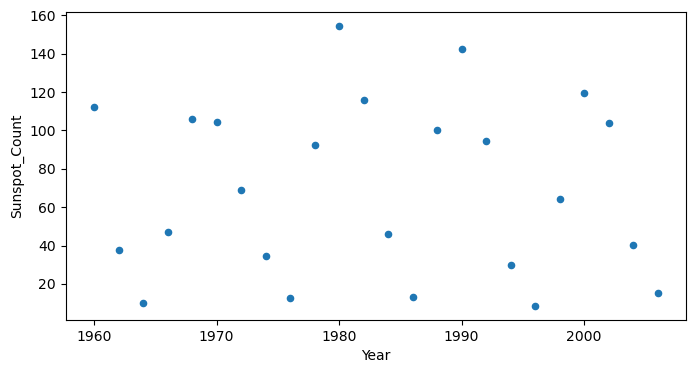

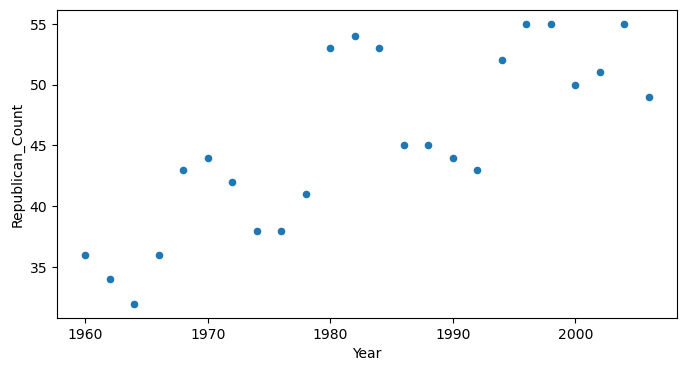

In [3]:
# Plot figure
df.plot.scatter(x="Year", y="Sunspot_Count", figsize = (8,4))
df.plot.scatter(x="Year", y="Republican_Count",figsize = (8,4))

### Q2

In [4]:
years = (df.loc[:,"Year"] - 1960)/40
years

0     0.00
1     0.05
2     0.10
3     0.15
4     0.20
5     0.25
6     0.30
7     0.35
8     0.40
9     0.45
10    0.50
11    0.55
12    0.60
13    0.65
14    0.70
15    0.75
16    0.80
17    0.85
18    0.90
19    0.95
20    1.00
21    1.05
22    1.10
23    1.15
Name: Year, dtype: float64

### Q3

In [5]:
X = years
y = df.loc[:,"Republican_Count"]

# Setting up the least square function (there is a numpy function for this, but we can also do it like that)
def least_squares(X, y):
    return np.linalg.pinv(X.T @ X) @ X.T @ y

#### a) Polynomial

In [6]:
# Setting up the functions
def polynomial(X, degree):
    matrix = np.column_stack([X**i for i in range(1, degree+1)]) # Column stack ensures that all vectors are column vectors (reshapes them if they are not), then stacks them horizontally to create a matrix. 
    #Add a column of 1s to the left for the bias term
    matrix = np.column_stack((np.ones(matrix.shape[0]),matrix))
    return matrix


# Performing the regression
X_poly = polynomial(X, 5)

# Compute the least squares solution
w_poly = least_squares(X_poly, y)
print(w_poly)

y_pred_poly = X_poly@w_poly

[   35.52966401   -45.11187053   478.24887916 -1158.24184578
  1135.41523922  -393.02346127]


> The results are the coefficients (weights) corresponding to the best-fitting linear model for our data augmented by the polynomial basis function specifically.

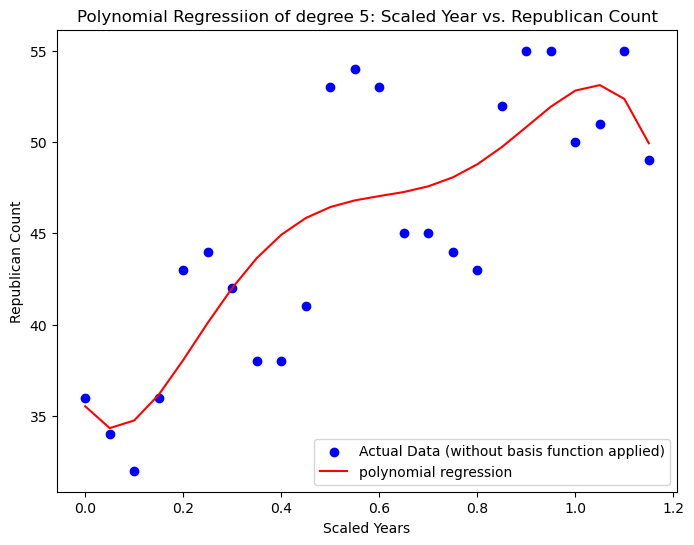

In [7]:
# Plot the regression

plt.figure (figsize=(8,6))
plt.scatter(X, y, color="blue", label="Actual Data (without basis function applied)")
plt.plot(X, X_poly@w_poly, 'r', label='polynomial regression')
plt.title("Polynomial Regressiion of degree 5: Scaled Year vs. Republican Count")
plt.xlabel("Scaled Years")
plt.ylabel("Republican Count")
plt.legend()
plt.show() # to avoid useless text before plot

In [8]:
train_error_poly = np.mean((y - y_pred_poly)**2)
print(f'Polynomial Basis train error: {train_error_poly:.10f}')

Polynomial Basis train error: 16.4575159995


#### b) Basis function b

In [9]:
# Set up the function
def basis_b(X):
    mus = np.arange(0,51,5)
    matrix = np.column_stack([np.exp((-(40*X-mu)**2)/25) for mu in mus])
    matrix = np.column_stack((np.ones(matrix.shape[0]), matrix))
    return matrix

# Performing the regression
X_b = basis_b(X)

# Compute the least squares solution
w_b = least_squares(X_b, y)
y_pred_b = X_b@w_b

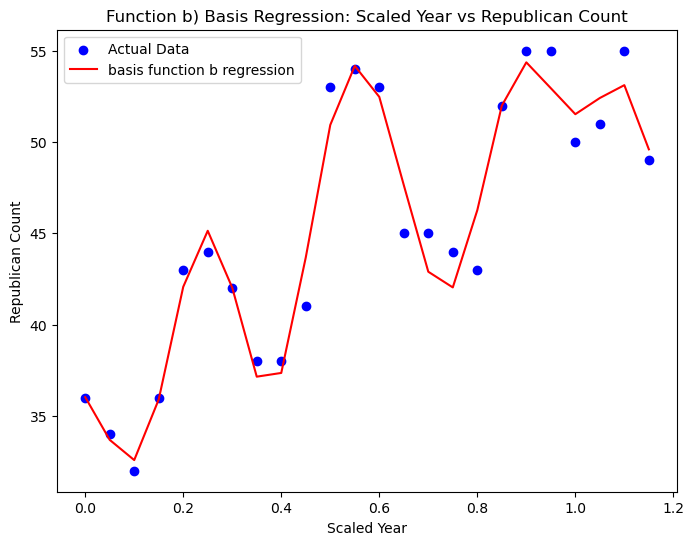

In [10]:
# Plot

plt.figure(figsize=(8,6))
plt.scatter(X, y, color="blue", label="Actual Data")
plt.plot(X, y_pred_b, 'r', label='basis function b regression')
plt.title("Function b) Basis Regression: Scaled Year vs Republican Count")
plt.xlabel('Scaled Year')
plt.ylabel('Republican Count')
plt.legend()
plt.show() # to avoid useless text before plot

In [11]:
# Train error
train_error_b = np.mean((y - y_pred_b)**2)
print(f'Basis b) function train error: {train_error_b:.10f}')

Basis b) function train error: 2.2613790257


#### c) $Cos (x/j)$ for $j = 1,...,5$

In [12]:
# Setting up the function
def cos(X):
    js = np.arange(1,6)
    matrix = np.column_stack([np.cos(X/j) for j in js])
    #Add a column of 1s to the left for the bias term
    matrix = np.column_stack((np.ones(matrix.shape[0]), matrix))
    return matrix

# Performing the regression
X_cos = cos(X)

# Compute the least squares solution
w_cos = least_squares(X_cos, y)
print(w_cos)

y_pred_cos = X_cos@w_cos

[ 580254.06263546  -19532.15164227  429306.35827085 -574518.66139121
 -330400.79334612  -85072.49515549]


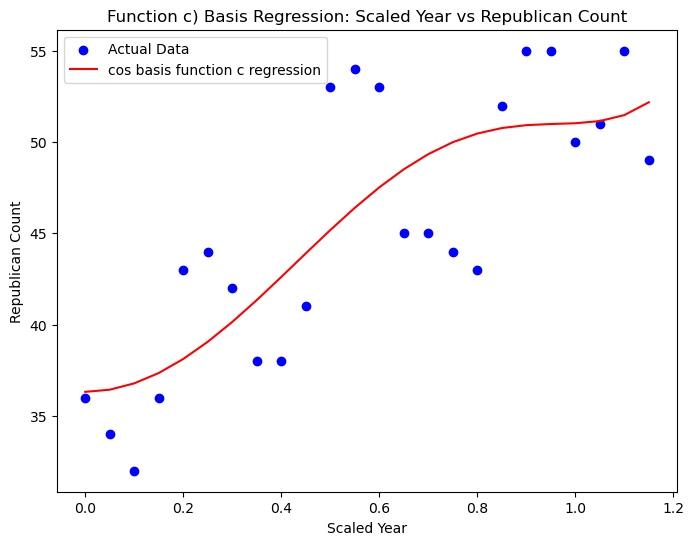

In [13]:
# Plot 

plt.figure(figsize=(8,6))
plt.scatter(X, y, color="blue", label="Actual Data")
plt.plot(X, y_pred_cos, 'r', label='cos basis function c regression')
plt.title("Function c) Basis Regression: Scaled Year vs Republican Count")
plt.xlabel('Scaled Year')
plt.ylabel('Republican Count')
plt.legend()
plt.show() # to avoid useless text before plot

In [14]:
# Train Error
train_error_cos = np.mean((y - y_pred_cos)**2)
print(f'Basis c) function train error: {train_error_cos:.10f}')

Basis c) function train error: 18.8701056193


#### c) $Cos (x/j)$ for $j = 1,...,25$

In [15]:
# Setting up the function
def cos2(X):
    js = np.arange(1,26)
    matrix = np.column_stack([np.cos(X/j) for j in js])
    #Add a column of 1s to the left for the bias term
    matrix = np.column_stack((np.ones(matrix.shape[0]), matrix))
    return matrix

# Performing the regression
X_cos2 = cos2(X)

# Compute the least squares solution
w_cos2 = least_squares(X_cos2, y)
print(w_cos2)

y_pred_cos2 = X_cos2@w_cos2

[  93900.22440292  -19254.45990157  398499.79078515 -405321.92409636
 -340434.03086288 -232723.50947789 -151861.3355532   -95280.85965941
  -55045.03411311  -26533.0384616    -4879.0582733    11487.06914061
   24158.32678012   34022.6575744    42058.33508053   48631.50086213
   53895.63646256   58429.45084201   62279.65259635   65363.8898542
   68248.12324647   70411.50515402   72580.4778364    74444.32757531
   75839.93082919   77118.67564822]


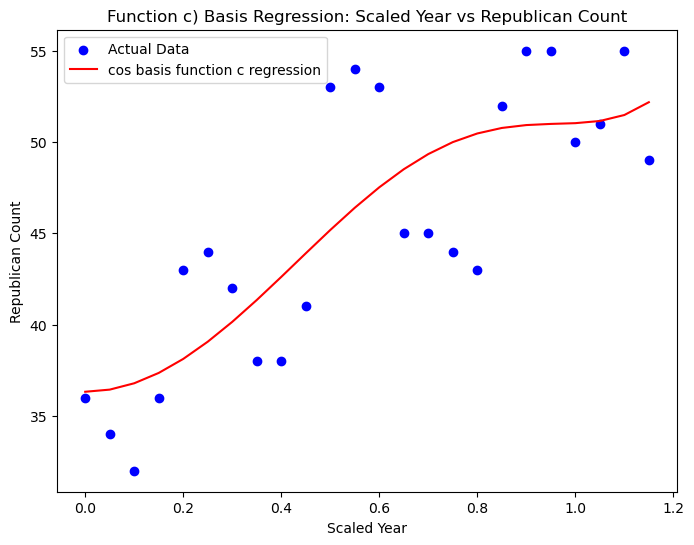

In [16]:
# Plot 

plt.figure(figsize=(8,6))
plt.scatter(X, y, color="blue", label="Actual Data")
plt.plot(X, y_pred_cos2, 'r', label='cos basis function c regression')
plt.title("Function c) Basis Regression: Scaled Year vs Republican Count")
plt.xlabel('Scaled Year')
plt.ylabel('Republican Count')
plt.legend()
plt.show() # to avoid useless text before plot

In [17]:
# Train Error
train_error_cos2 = np.mean((y - y_pred_cos2)**2)
print(f'Basis c) function train error: {train_error_cos2:10f}')

Basis c) function train error:  18.870341


#### Q4

> All train errors have been implemented after each plot.

## Exercise 2

### Q1

In [18]:
df2 = pd.read_csv("/Users/solalzana/Desktop/X/Machine Learning I/Lectures/1. Basic concepts and linear models/Assigment 1/housing.csv", delim_whitespace=True)
df2.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df2

/var/folders/1q/4p_js9jn14x3_527d5fmd8dr0000gn/T/ipykernel_41697/1933523375.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df2 = pd.read_csv("/Users/solalzana/Desktop/X/Machine Learning I/Lectures/1. Basic concepts and linear models/Assigment 1/housing.csv", delim_whitespace=True)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
501,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
502,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
503,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [19]:
def least_squares(X, y): # Re-defined here in Exercise 2 for clarity purposes
    return np.linalg.inv(X.T @ X) @ X.T @ y

There is a statistically significant association between INDUS and CRIM: t-statistic = 9.971167140713153. See graph below for graphical representation.
There is a statistically significant association between NOX and CRIM: t-statistic = 10.40751255995425. See graph below for graphical representation.
There is a statistically significant association between RM and CRIM: t-statistic = -5.033327754792549. See graph below for graphical representation.
There is a statistically significant association between RAD and CRIM: t-statistic = 17.97516297001302. See graph below for graphical representation.
There is a statistically significant association between TAX and CRIM: t-statistic = 16.07521337536088. See graph below for graphical representation.
There is a statistically significant association between PTRATIO and CRIM: t-statistic = 6.780564302941065. See graph below for graphical representation.
There is a statistically significant association between LSTAT and CRIM: t-statistic = 11.4699

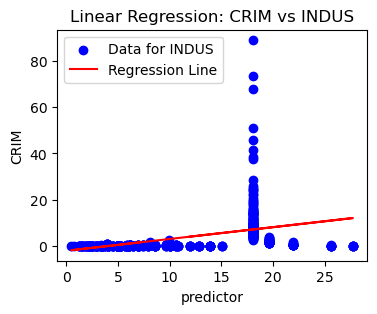

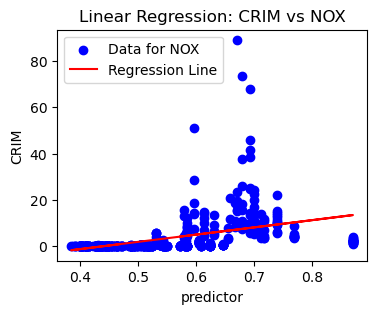

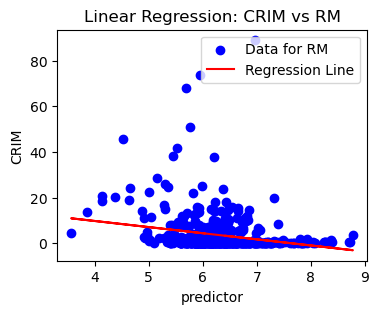

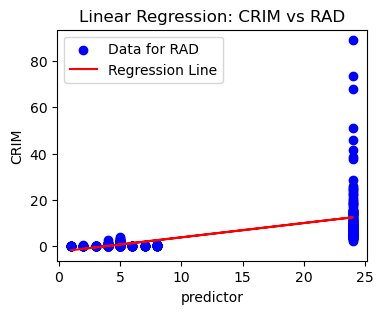

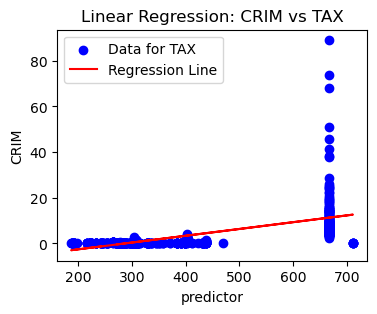

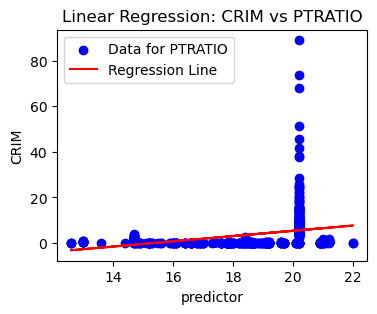

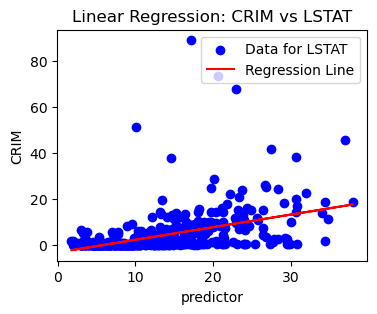

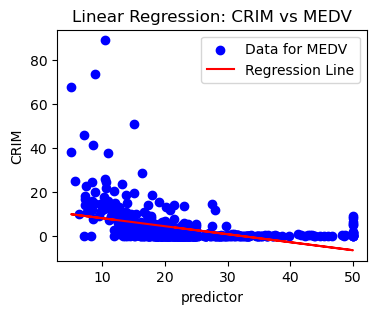

In [20]:
# Define the predictors and output (actual y values)
predictors = ['INDUS', 'NOX', 'RM', 'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV']
y = np.array(df2['CRIM'])
n = len(y)

# Function to perform a simple linear regression
def simple_linreg(predictor):
    X = np.array(df2[predictor])
    X = np.column_stack((np.ones(X.shape[0]), X)) # Add term for intercept
    w = least_squares(X, y)
    y_pred = X@w
    s2 = (np.sum((y - y_pred)**2))/(n-2) # 2 parameters (intercept + slope)
    Var = s2 * np.linalg.inv(X.T @ X) # Variance - covariance matrix computed using the formula
    se = np.sqrt(np.diag(Var)) # Standard error (diag i's are coefficient variances)
    # Now we check if we reject the null hypothesis that the model is not significant
    t_stat = w[1]/se[1] # slope coeff / SE
    t_critical = 1.96 # z value delimiting the 95% confidence interval on the standard normal gaussian
    if np.abs(t_stat) >= t_critical:
        print(f"There is a statistically significant association between {predictor} and CRIM: t-statistic = {t_stat}. See graph below for graphical representation.")
    else:
        print(f"There is no statistically significant association between {predictor} and CRIM: t-statistic = {t_stat}. See plot below for graphical representation.")
    
def simple_linreg2(predictor):
    X = np.array(df2[predictor])
    X = np.column_stack((np.ones(X.shape[0]), X))
    coeffs = least_squares(X, y)
    return coeffs

# Adding this function here since i will need the coeffs of the simple regression for Question 3
coeffs_simple = []
for i in predictors:
    coeffs_simple.append(simple_linreg2(i)[1])

for predictor in predictors:
    simple_linreg(predictor)
    coeffs = simple_linreg2(predictor)
    X = np.array(df2[predictor])
    plt.figure(figsize=(4, 3))
    plt.scatter(X, y, color="blue", label=f"Data for {predictor}")
    plt.plot(X, coeffs[0]+coeffs[1]*X, 'r', label=f"Regression Line")
    plt.title(f"Linear Regression: CRIM vs {predictor}")
    plt.xlabel("predictor")
    plt.ylabel("CRIM")
    plt.legend()


> The t-statistic for each iondependent variable suggests a correlation exists between each of the predictors and the crime rate. Lookijng at the graphs, we can see this may not be very accurate as a simple linear regression is understandably under-fitting the real data given the inputs we have here. This could be due to missing spurious correlations between independent variables, that could bring further information on how the crime rate depends on these.

### Q2

In [21]:
# Define the predictors and output (actual y values)
predictors = ['INDUS', 'NOX', 'RM', 'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV']
y = np.array(df2['CRIM'])
n = len(y)

# Function to perform a multi-linear regression
def multi_linreg(predictor):
    X = np.array(df2[predictor])
    X = np.column_stack((np.ones(X.shape[0]), X)) # Add term for intercept
    w = least_squares(X, y)
    y_pred = X@w
    d = X.shape[1] 
    s2 = (np.sum((y - y_pred)**2))/(n-d) # 2 parameters (intercept + slope)
    Var = s2 * np.linalg.inv(X.T @ X) # Variance - covariance matrix computed using the formula
    se = np.sqrt(np.diag(Var)) # Standard error (diag i's are the variances of the coefficients)
    # Now we check if we reject the null hypothesis that the model is not significant
    t_stat = w/se # slope coeff / SE
    t_critical = 1.96 # z value delimiting the 95% confidence interval on the standard normal gaussian

    for i, predictor in enumerate(['Intercept'] + predictors):
        print(f"Coefficient for {predictor}: {w[i]}")
        print(f"Standard Error: {se[i]}")
        print(f"t-statistic: {t_stat[i]}")
        print()
        if np.all(np.abs(t_stat[i]) >= t_critical):
            print(f"\033[32mThere is a statistically significant association between {predictor} and CRIM. \n t-statistic = {t_stat[i]}. \n See graph below for graphical representation.\033[0m")
        else:
            print(f"There is no statistically significant association between {predictor} and CRIM. \n t-statistic = {t_stat[i]}. \n See plot below for graphical representation.")
        print()
    

multi_linreg(predictors)



Coefficient for Intercept: 2.876110779439962
Standard Error: 6.084035156146645
t-statistic: 0.4727307955369478

There is no statistically significant association between Intercept and CRIM. 
 t-statistic = 0.4727307955369478. 
 See plot below for graphical representation.

Coefficient for INDUS: -0.01644487089698988
Standard Error: 0.08024453718169983
t-statistic: -0.2049344600212887

There is no statistically significant association between INDUS and CRIM. 
 t-statistic = -0.2049344600212887. 
 See plot below for graphical representation.

Coefficient for NOX: -3.4824565168439148
Standard Error: 4.452000195171752
t-statistic: -0.782222903004515

There is no statistically significant association between NOX and CRIM. 
 t-statistic = -0.782222903004515. 
 See plot below for graphical representation.

Coefficient for RM: 0.7986123640215348
Standard Error: 0.6018793074165142
t-statistic: 1.3268646291388064

There is no statistically significant association between RM and CRIM. 
 t-statist

> As said before, the difference in results may come from ingored interactions between independent variables. Taking all predictors into account, we find that LSTAT, MEDV, and RAD are suggested as statistically significant variables to accurately predict the crime rate.

### Q3

In [22]:
def multi_linreg2(predictor):
    X = np.array(df2[predictor])
    X = np.column_stack((np.ones(X.shape[0]), X)) # Add term for intercept
    w = least_squares(X, y)
    return w

coeffs_multi = (multi_linreg2(predictors)[1:])

print(coeffs_multi)
print(coeffs_simple)

[-1.64448709e-02 -3.48245652e+00  7.98612364e-01  5.94770390e-01
 -1.76688339e-03 -3.28846489e-01  1.96511556e-01 -1.57353788e-01]
[0.5101095303751014, 31.24091916806472, -2.680749972582769, 0.6182865350518734, 0.029740141879636667, 1.1520202366757206, 0.5489854609766281, -0.3630541109349674]


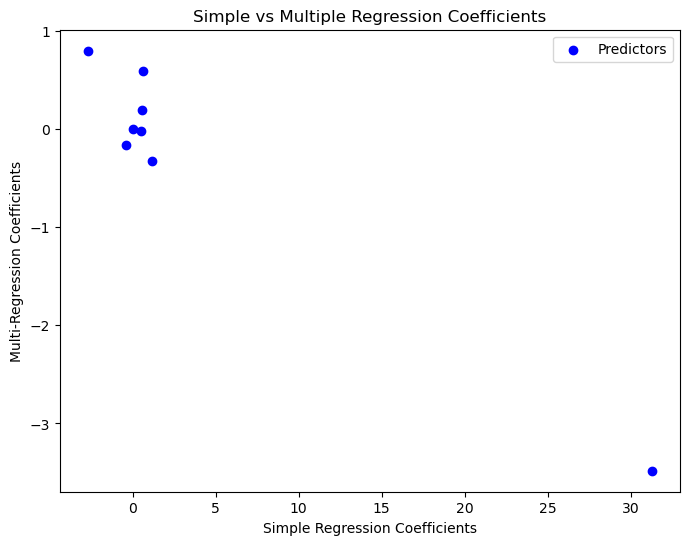

In [23]:
# Plot simple vs multiple regression coefficients
plt.figure(figsize=(8, 6))
plt.scatter(coeffs_simple, coeffs_multi, color='blue', label='Predictors')
plt.xlabel('Simple Regression Coefficients')
plt.ylabel('Multi-Regression Coefficients')
plt.title('Simple vs Multiple Regression Coefficients')
plt.legend()
plt.show()

### Q4

In [27]:
def se(predictor):
    X = np.array(df2[predictor])
    X = np.column_stack((np.ones(X.shape[0]), X)) # Add term for intercept
    w = least_squares(X, y)
    y_pred = X@w
    d = X.shape[1] 
    s2 = (np.sum((y - y_pred)**2))/(n-d) # 2 parameters (intercept + slope)
    Var = s2 * np.linalg.inv(X.T @ X) # Variance - covariance matrix computed using the formula
    se = np.sqrt(np.diag(Var)) # Standard error (diag i's are the variances of the coefficients)
    return se

error = se(predictors)

for predictor in predictors:
    X = np.array(df2[predictor]).reshape(-1,1)
    X = np.hstack([X, X**2, X**3])
    X = np.column_stack([np.ones((X.shape[0], 1)), X]) # Add term for intercept
    w = least_squares(X, y)
    y_pred = X@w
    d = X.shape[1]
    s2 = np.sum((y - y_pred)**2) / (n - (d + 1))
    Var = s2*np.linalg.inv(X_poly.T @ X_poly)
    se = np.sqrt(np.diag(Var))
    t_stat = w / se
    t_critical = 1.96
    if np.all(np.abs(t_stat) >= t_critical):
        print(f"\033[32mThere is a statistically significant association between {predictor} and CRIM. \n t-statistic = {t_stat[i]}. \n See graph below for graphical representation.\033[0m")
    else:
        print(f"There is no statistically significant association between {predictor} and CRIM. \n t-statistic = {t_stat[i]}. \n See plot below for graphical representation.")
    print()

ValueError: operands could not be broadcast together with shapes (4,) (6,) 

> Here, we can see that the t-statistic is much higher (ie. p-value is much lower) for almost all variables, suggesting the polynomial model better fits the actual data.

### Q5

In [28]:
# Applying the transformation to y and checking for skewness in each predictor

# Apply the given transformation to the response variables y and y

y_transformed = np.log1p(y)
X_transformed = df2[predictors]

for col in X_transformed.columns:
    if np.abs(X_transformed[col].skew()) > 0.3:
        X_transformed[col] = np.log1p(X_transformed[col])
X_transformed = np.hstack([np.ones((X_transformed.shape[0], 1)), X_transformed])

# Fit the multiple linear regression model using the transformed data
w_transformed = least_squares(X_transformed, y_transformed)

# Calculate msefor the transformed model
y_pred_transformed = X_transformed @ w_transformed
MSE_transformed = np.mean((y_transformed - y_pred_transformed) ** 2)

print(f"coeffs_transformed= {w_transformed}")
print(f"MSE_transformed= {MSE_transformed}")

coeffs_transformed= [-0.40652551  0.00737155  2.36804053  0.26638348  0.78472547  0.29694058
 -0.483584   -0.11690472 -0.67476532]
MSE_transformed= 0.1749007064201381


/var/folders/1q/4p_js9jn14x3_527d5fmd8dr0000gn/T/ipykernel_41697/3573984251.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_transformed[col] = np.log1p(X_transformed[col])


> We can see that the mse is much lower with this transofrmation. I couldn't succeed in finishing question 4 in time unfortunately (I only have 4 results out of 8 due to a dimension problem), but we need to compare this MSE to the one of the polynomial to check which transformation fits better the data to be used for actual prediction.